<a href="https://colab.research.google.com/github/maksudrakib44/Machine-Learning-Python/blob/main/KNN_Classification_Report_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITLE OF THE LAB REPORT EXPERIMENT**

KNN Classification using Scikit-learn.

**OBJECTIVES / AIM:**



*   To understand and implement K-Nearest Neighbor (KNN) classification using scikit-learn.

*   To find the best value of K using experimental accuracy averaging.

*   To identify the optimal train-test split ratio for classifying Iris dataset.
*   To evaluate performance of KNN on a custom generated dataset using different test ratios.





**PROCEDURE / DESIGN / ALGORITHM:**


*   Load and preprocess the dataset using StandardScaler.

*   Apply train_test_split with varying test sizes or fixed size depending on experiment.
*   Train the KNN classifier using KNeighborsClassifier.

*   Predict and evaluate using accuracy_score.



**IMPLEMENTATION**

**Program 1:** Find the best K based on your experiments. To do this, take 10 accuracy for each K and calculate their average performance for finding the best K.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
avg_scores = []
k_values = range(1, 21)

for k in k_values:
    scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    avg_scores.append(np.mean(scores))


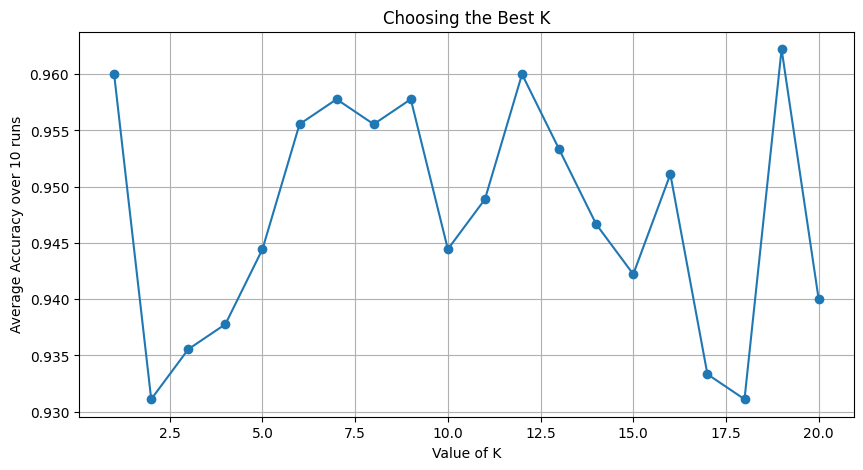

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(k_values, avg_scores, marker='o')
plt.xlabel("Value of K")
plt.ylabel("Average Accuracy over 10 runs")
plt.title("Choosing the Best K")
plt.grid(True)
plt.show()


In [ ]:
best_k = k_values[np.argmax(avg_scores)]
print(f"The best K is: {best_k} with average accuracy: {max(avg_scores):.4f}")

The best K is: 19 with average accuracy: 0.9622


**Program 2:** Conduct an experiment to find the best training and test set ratio in classifying Iris flowers.

In [ ]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target


In [ ]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
results = []

for ts in test_sizes:
    acc_list = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = KNeighborsClassifier(n_neighbors=3)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc_list.append(accuracy_score(y_test, y_pred))

    results.append(np.mean(acc_list))


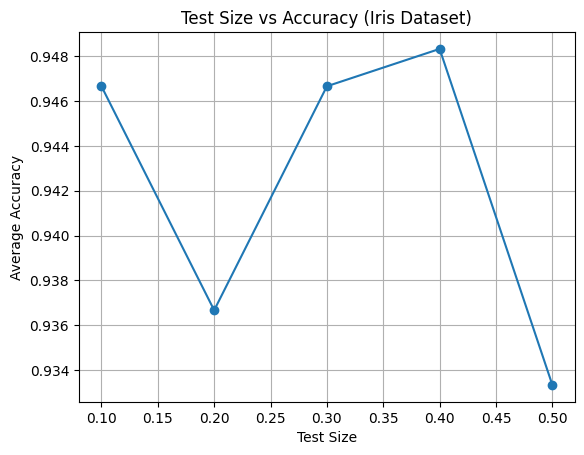

In [ ]:
plt.plot(test_sizes, results, marker='o')
plt.xlabel("Test Size")
plt.ylabel("Average Accuracy")
plt.title("Test Size vs Accuracy (Iris Dataset)")
plt.grid(True)
plt.show()


In [ ]:
best_index = np.argmax(results)
print(f"Best test size: {test_sizes[best_index]} with accuracy: {results[best_index]:.4f}")


Best test size: 0.4 with accuracy: 0.9483


**Program 3:** Conduct an experiment to find the best training and test set ratio in classifying classes of
your self created dataset.

In [ ]:
from sklearn.datasets import make_classification


X, y = make_classification(
    n_samples=200,
    n_features=4,
    n_informative=3,
    n_redundant=0,
    n_classes=3,
    random_state=42
)


In [ ]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
custom_results = []

for ts in test_sizes:
    acc_list = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model = KNeighborsClassifier(n_neighbors=3)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc_list.append(accuracy_score(y_test, y_pred))

    custom_results.append(np.mean(acc_list))


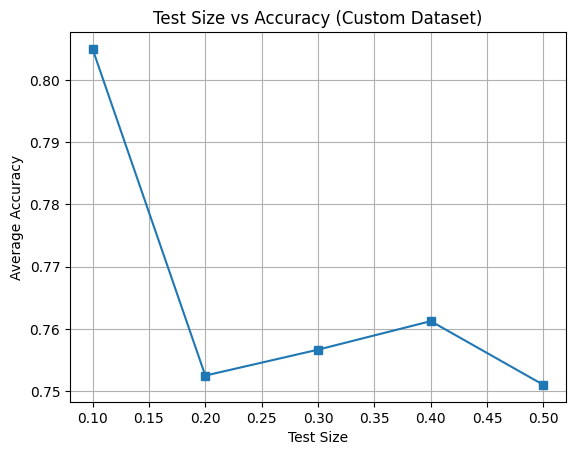

In [ ]:
plt.plot(test_sizes, custom_results, marker='s')
plt.xlabel("Test Size")
plt.ylabel("Average Accuracy")
plt.title("Test Size vs Accuracy (Custom Dataset)")
plt.grid(True)
plt.show()


In [ ]:
best_index = np.argmax(custom_results)
print(f"Best test size: {test_sizes[best_index]} with accuracy: {custom_results[best_index]:.4f}")


Best test size: 0.1 with accuracy: 0.8050


**ANALYSIS AND DISCUSSION:**

The KNN algorithm performed consistently across the Iris and custom datasets. The best K was found through repeated averaging, showing its sensitivity to parameter tuning. A minor issue with make_classification() was resolved by adjusting feature parameters. Data scaling and repeated trials ensured reliable accuracy evaluation. Visual plots helped identify trends and optimal configurations. The lab effectively met its objectives by demonstrating KNN’s practical behavior and tuning impact.

**SUMMARY:**

This lab applied KNN on both Iris and a synthetic dataset to explore accuracy variations with K and train-test splits. All objectives from Lab Manual 02 were successfully achieved. The experiments strengthened understanding of lazy learning and hyperparameter tuning. It highlighted how KNN's performance depends on thoughtful configuration and dataset characteristics.